# Vectorized operations

In this workshop you going to learn about one of the most fundamental block of datascience, called the vector operations. \
In order for this workshop to work you will need numpy to be installed

In [ ]:
%pip install numpy

And also matplotlib

In [ ]:
%pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## What are vectorized operations

You can think of it as very fast matrix operations. It allows you to manipulate arrays, while still removing the performance over head of default lists. \
Here is an example:

In [3]:
def vec_add(a,b):
    return a + b # vector addition

array_1 = np.array([1,2,3,4,5])
array_2 = np.array([6,7,8,9,10])

print(vec_add(array_1, array_2))

[ 7  9 11 13 15]


### Why is it so "fast"?
Numpy leverages c as its backend such that runs with no overhead. It also leverages hardware acceleration, to process operations in parallel.

But there is (as always) a catch! \
Numpy arrays arent mutable, meaning once they are created you can only modify them with making a new one (very expensive operation you want to avoid it) 

### Characteristics of Numpy arrays

Numpy arrays are represented as one single continouos array in the memory.
To actually give shapes to numpy arrays (multiple dimmensions), striding is used to determine each dimensions location.
To access this metadata use the header of the array

In [4]:
print(f"Strides: {array_1.strides}")
print(f"Shape: {array_1.shape}")
print(f"Data Type: {array_1.dtype}")

multi_dim_array = np.array([[1,2,3,4,5],[6,7,8,9,10]])
print(multi_dim_array)

print(f"Strides: {multi_dim_array.strides}")
print(f"Shape: {multi_dim_array.shape}")
print(f"Data Type: {multi_dim_array.dtype}")



Strides: (4,)
Shape: (5,)
Data Type: int32
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
Strides: (20, 4)
Shape: (2, 5)
Data Type: int32


The strides are basically an addition in retrieveing memory data \
Above you see (20,4) where 4 is detemined by the data type 32 bits = 4 bytes and 20 is determined by the elements in the previous dimension 4*5 = 20 \
Such that to get from row 1 to row 2 you need to add 20 to the memory location of the first element of the first row. \
Changing the strides:

In [5]:
as_strided = np.lib.stride_tricks.as_strided
as_strided(multi_dim_array,(5,2),(4,20))

array([[ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [ 5, 10]])

After changing the stripes you can see it transposed the array. \
This did not actually change the array it just changed the way we look at the "memory".
This type of manipulation allows numpy to do mutation operations insanely fast.

### What operations are available
A huge number of transforms or operations used in linear algebra is available from very basic to advanced ones.
such as:

In [6]:
array_1 = np.array([1,2,3,4,5])
array_2 = np.array([6,7,8,9,10])
# addition
print(array_1 + array_2)

# subtraction
print(array_1 - array_2)

# multiplication
print(array_1 * array_2)

# division
print(array_1 / array_2)


[ 7  9 11 13 15]
[-5 -5 -5 -5 -5]
[ 6 14 24 36 50]
[0.16666667 0.28571429 0.375      0.44444444 0.5       ]


### Mutation operations
You can use operations like flip, transpose, swap axes. this basically just moves the strides around for more optimal operation.

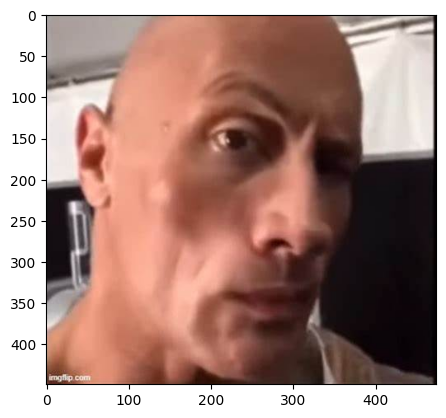

In [7]:
from PIL import Image
meme = Image.open("meme.jpeg")
meme = np.array(meme)
plt.imshow(meme)

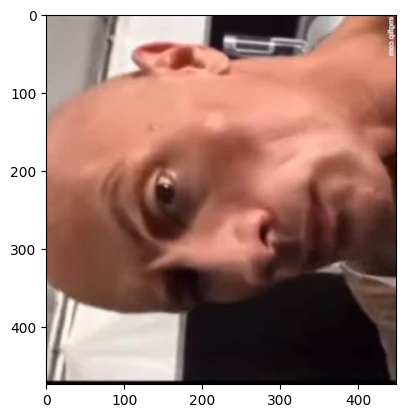

In [8]:
meme_flip = np.swapaxes(meme,0,1)
plt.imshow(meme_flip)

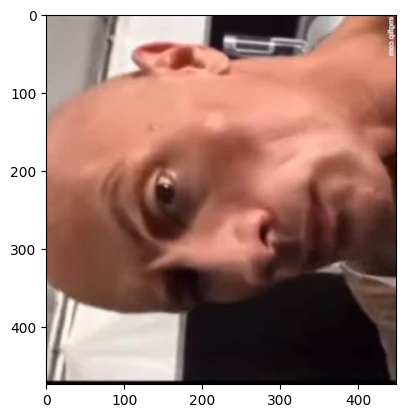

In [9]:
meme_transpose = np.transpose(meme, axes=(1,0,2))
plt.imshow(meme_transpose)

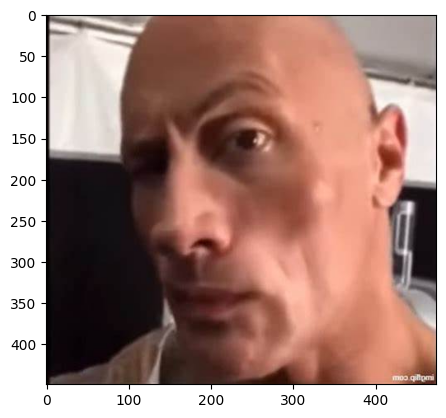

In [10]:
mirrored_meme = meme.copy()
mirrored_meme = np.flip(mirrored_meme, axis=1)
plt.imshow(mirrored_meme)

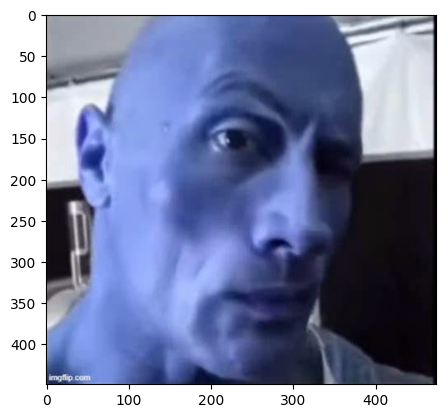

In [11]:
meme_color_swap = meme.copy()
meme_color_swap[:,:,:] = meme[:,:,::-1] # "walking" back on the color axis

plt.imshow(meme_color_swap)

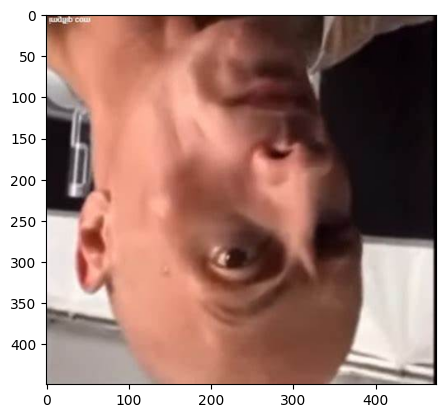

In [12]:
upside_down_meme = meme.copy()
upside_down_meme = np.flip(upside_down_meme, axis=0)
plt.imshow(upside_down_meme)

### Indexing of numpy arrays
Indexing numpy arrays is similar to default lists, however they are way more flexible than standard list indices. \
Standard indexing:

In [13]:
print(meme.shape)
print(meme[0,0,0])


(449, 474, 3)
170


Numpy arrays also allow for slicing operations. This is great for extracting the areas of an array

(225, 238, 3)


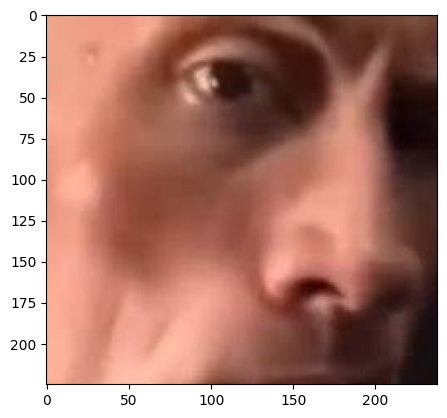

In [14]:
meme_shape = meme.shape
meme_half_shape = (meme_shape[0]//4, meme_shape[1]//4, meme_shape[2])
center_meme = meme[meme_half_shape[0]:-meme_half_shape[0], meme_half_shape[1]:-meme_half_shape[1], :]
plt.imshow(center_meme)
print(center_meme.shape)

You can also specify steps in slicing by using the third element in the slicer

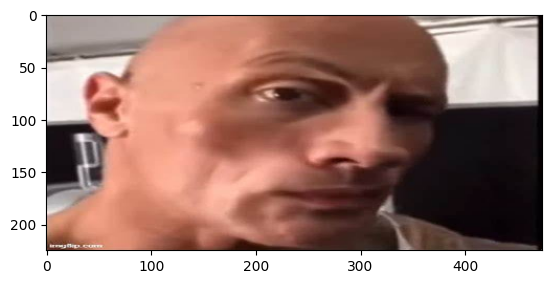

In [16]:
squished_meme = meme.copy()
squished_meme = squished_meme[::2,:, :]
plt.imshow(squished_meme)

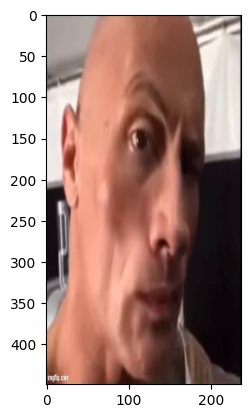

In [17]:
other_way_squished_meme = meme.copy()
other_way_squished_meme = other_way_squished_meme[:, ::2, :] 
plt.imshow(other_way_squished_meme)

### Broadcasting
In numpy for most above mentioned operations require that the arrays have a certain shape such as you cant matrix mulitply (m x n) with (m x n) only (m x n) x (n x s)
Because of this reason broad casting exists.\
Broadcasting allows for a temporary change in the orientation of the array.\
Its mostly handled by numpy but sometimes it has to be handled manually \

In [18]:
# auto broadcasting
array_1 = np.array([1,2,3,4,5])

print(array_1 + 1) # creates an array with the same shape as the one above and adds 1 to each element

[2 3 4 5 6]


In [19]:
# manual broadcasting

array_1 = np.arange(0,50,1, dtype=np.int32).reshape(10,5)
print(f"Original array: \n{array_1}",)
mult_array = np.array([1,2,3,4,5])
print(f"Array to multiply with: \n{mult_array}")
result = array_1 * mult_array[None,:]
print(f"Resulting array with broadcasting: \n{result}")


Original array: 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]
Array to multiply with: 
[1 2 3 4 5]
Resulting array with broadcasting: 
[[  0   2   6  12  20]
 [  5  12  21  32  45]
 [ 10  22  36  52  70]
 [ 15  32  51  72  95]
 [ 20  42  66  92 120]
 [ 25  52  81 112 145]
 [ 30  62  96 132 170]
 [ 35  72 111 152 195]
 [ 40  82 126 172 220]
 [ 45  92 141 192 245]]


Notice that the columns are mutiplied according to our second array
it is essentially the same as doing this

In [20]:
array_2 = np.arange(0,50,1, dtype=np.int32).reshape(10,5)
print(f"Original array: \n{array_1}",)
mult_array_2 = np.array([[1,2,3,4,5] for i in range(10)])
print(f"Array to multiply with: \n{mult_array_2}")
result_2 = array_2 * mult_array_2
print(f"Resulting array with broadcasting: \n{result_2}")

Original array: 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]
Array to multiply with: 
[[1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]
 [1 2 3 4 5]]
Resulting array with broadcasting: 
[[  0   2   6  12  20]
 [  5  12  21  32  45]
 [ 10  22  36  52  70]
 [ 15  32  51  72  95]
 [ 20  42  66  92 120]
 [ 25  52  81 112 145]
 [ 30  62  96 132 170]
 [ 35  72 111 152 195]
 [ 40  82 126 172 220]
 [ 45  92 141 192 245]]


In [21]:
# comparing the arrays together
print(f"Are arrays equal: {np.array_equal(result, result_2)}")

Are arrays equal: True


## Masking
Masking is an other technique in numpy which provides ability to use a boolean array to "enable" and "disable" elements or dimensions

In [22]:
to_be_masked = np.arange(0,50,1, dtype=np.int32).reshape(10,5)
print(f"Original array: \n{to_be_masked}",)
mask = np.array([True, False, True, False, True])
print(f"Mask: \n{mask}")
masked_array = to_be_masked[:,mask]
print(f"Masked array: \n{masked_array}")


Original array: 
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]
Mask: 
[ True False  True False  True]
Masked array: 
[[ 0  2  4]
 [ 5  7  9]
 [10 12 14]
 [15 17 19]
 [20 22 24]
 [25 27 29]
 [30 32 34]
 [35 37 39]
 [40 42 44]
 [45 47 49]]


# End of workshop continue for exercises

Note: these exercises aren't mandatory if you know them otherwise it is very strongly recommended to go through them. It will also tell me how determined are you to work. \
Note: there are operations in numpy for basically everything, if you are looking for something I recommend googling it and looking at the documentation

In [ ]:
def generate_chess():
    board = np.zeros((8,8,3), dtype=np.int32)
    board[::2, ::2, :] = 255
    board[1::2, 1::2, :] = 255
    return board

board = generate_chess()

plt.imshow(board)
plt.show()

Select only the black cells in the cell below with slicing, filtering, and boolean indexing

In [ ]:
# your code here

Rearrange the chess board into a 1D Vector

In [ ]:
# your code here

In [ ]:

assert one_board.shape == (64,3)
assert np.all(one_board[0] == np.array([255,255,255]))

Transpose the chess board (Note: It probably won't look any different)

In [ ]:
# your code here

Paint the most bottom right corner to pink (255,0,255) (name it to board_pk)

In [ ]:
# your code here

In [ ]:
plt.imshow(board_pk)

In [ ]:
assert np.all(board_pk[-1,-1,:] == np.array([255,0,255])) 

Broadcast the chess board into 4D (B,H,W,C)

In [ ]:
# Your code here

In [ ]:
assert board_4D.shape == (1,8,8,3)

### This is the end of the lab
if you got this far congratulations, and if you have any questions ask me